# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 27th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [35]:
""" Libraries we are using for this practicum """

from skimage import io, img_as_float, filters, feature
from skimage.color import rgb2gray,rgba2rgb
from matplotlib import pyplot as plt
from scipy import ndimage
import numpy as np

In [3]:
"""
This function display the images with the settings defined below. We will use this function every time we want
to display an image.

@params
    title: the title that the image will have
    image: the image to display
    axis: if we want to use or not axis, predefined as 'on'.
    
"""

def plot_image(image, title="", axis='off', v_min=None, v_max=None):
    plt.axis(axis)
    plt.title(label=title, 
          fontsize=20)
    if v_min == None and v_max == None:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image,cmap='gray', vmin=v_min, vmax=v_max)
    plt.show()
   

"""
This function display the images with the settings defined below. 
We will use this function in the following funtion.

@params
    img: where we will display the image
    image: the image to display
    gray: boolean if we will use cmap to display the image
    title: the title that the image will have
    axis: if we want to use or not axis, predefined as 'off'.
    
"""

def subplot_image(img, image, gray, title="", axis="off"):
    img.axis(axis)
    img.set_title(title)
    if gray:
        img.imshow(image,cmap='gray')
    else:
        img.imshow(image)

        
"""
This function display the images in order.

@params
    images: list of images to display
    titles: list of titles that each image will have
    gray: list of booleans for each image. if True we will use cmap to display the image
    rows: number of rows we want to use to display the images
    cols: number of cols we want to use to display the images
    
"""
    
def plot_in_order(images=[],titles=[],gray=[],rows=0,cols=0):
    
    # First we check if we have one cell per image
    if (rows * cols) < (len(images)):
        print(colored("Attention! The dimensions of the subplot are incorrect!","red"))
        return
    
    # Create a subplot
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 5))

    # Index to acces the values of the lists (images, titles, gray)
    index = 0 
    total = len(images)
    
    for i in range(rows):
        for j in range(cols):
            
            if index < total:
                
                if rows == 1 and cols == 1:
                    img = axs
                
                elif rows == 1:
                    img = axs[j]
                
                else:
                    img = axs[i,j]
                    
                subplot_image(img, images[index], gray[index], titles[index])
                
            else:
                image = axs[i,j]
                image.axis('off')
                
            index += 1
            
    #Finally display the subplot
    plt.show()

### 2.1 RGB histogram visualization

a) Read the image "face.png" in the folder "images" and visualize the RGB image as well as each of its channels separately (R, G, and B).
Note: Before applying the histogram, you should pass the image into float.

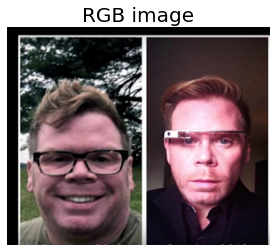

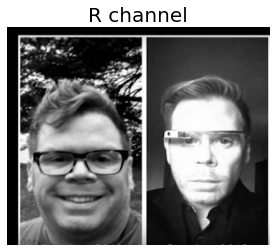

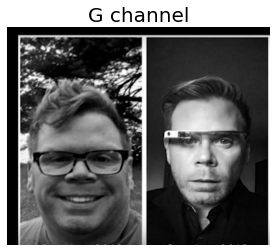

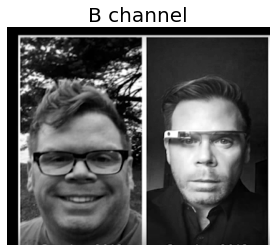

In [4]:
# Load the image
face_img = io.imread("images/face.png")

# Get each channel
r_channel = face_img[:,:,0]
g_channel = face_img[:,:,1]
b_channel = face_img[:,:,2]

# Display images
plot_image(face_img, "RGB image")
plot_image( r_channel, "R channel")
plot_image( g_channel, "G channel")
plot_image( b_channel, "B channel")

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

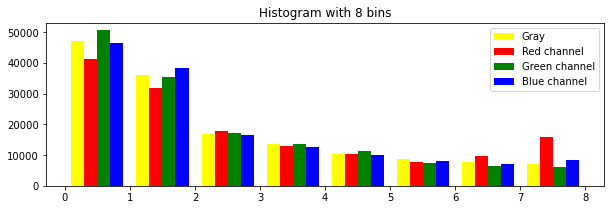

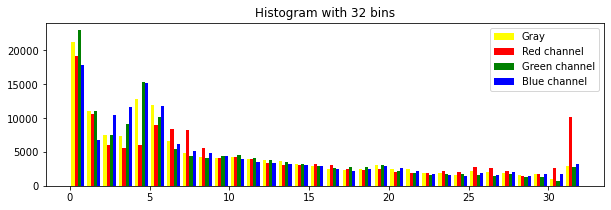

In [5]:
"""
This function will display the histograms.

@params
    title: the title the histogram will have
    image: the image we want to analyze
    nbins: the number of sections we want to distribute the intensities of the pixels
"""

def plot_histogram(title, image, nbins, colours):
    
    if(type(image) != 'float64'):
        image = image / 255
    
    images = [rgb2gray(image), image[:,:,0], image[:,:,1], image[:,:,2]]
    
    histogram = []
    nbins = float(nbins)
    
    for im in images:
        histogram.append((im * nbins).ravel())
    
    plt.figure(figsize=(10, 3))
    
    #Plot the histogram with the calculated values, setting the labels and the colors
    plt.hist(histogram, bins=int(nbins),label=['Gray','Red channel','Green channel','Blue channel'],color=colours)
    plt.legend(loc='best') #Set the labels cell on the histogram graphic
    plt.title(title)
    plt.show()
    
plot_histogram("Histogram with 8 bins", face_img, 8, ["yellow","red","green","blue"])
plot_histogram("Histogram with 32 bins", face_img, 32, ["yellow","red","green","blue"])

## Questions

#### What is the histogram representing for an image?
The histogram of the image is a graphic that represents the number of pixels we have of each colour (rgb and gray) for every intensity we have established (nbins).

#### Comment their differences.
If we compare the 3 channels and the gray level we can observe that they have the same values more or less. However, it should be noted that the red channel has a very high value at the highest intensity level

#### What type should be the image in order to compute the histogram?
The image can be float or integer in order to be able to compute the histogram. In our case, since we transform the image into grayscale (float) we have to transform also the original image (uint8) into float64. Therefore, we can classify all the images in equally conditions.

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the grayscale image in (1) with a transposed version of the mask in (2).
4. Convolve the grayscale image in (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

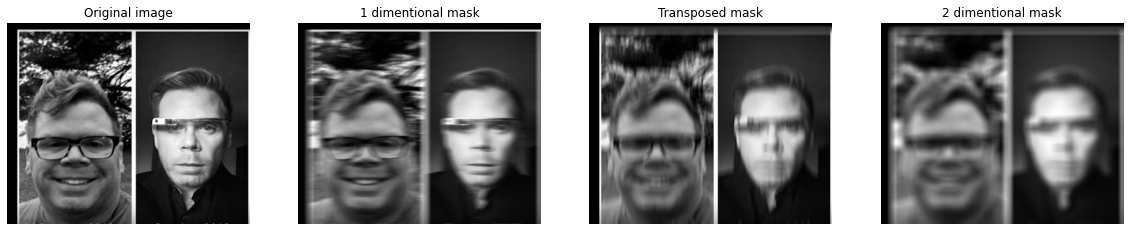

In [25]:
# Load image and convert to grayscale
face_img = io.imread("images/face.png")
face_img = rgb2gray(face_img)

# Create mask and normalize in order to have values from 0 to 1
mask_h1d = np.ones(shape=(1,15))
mask_h1d /= np.sum(mask_h1d)

# Convolve
face_img_convolved = ndimage.convolve(face_img,mask_h1d)

# Create mask and normalize in order to have values from 0 to 1
mask_h1d = np.ones(shape=(1,15))
mask_h1d = np.transpose(mask_h1d)
mask_h1d /= np.sum(mask_h1d)

# Convolve
face_img_transp = ndimage.convolve(face_img, mask_h1d)

# Create mask and normalize in order to have values from 0 to 1
mask_h1d = np.ones(shape=(15,15))
mask_h1d /= np.sum(mask_h1d)

# Convolve
face_img_2d = ndimage.convolve(face_img, mask_h1d)

# Display images
plot_in_order(images=[face_img, face_img_convolved, face_img_transp, face_img_2d],
              titles=["Original image", "1 dimentional mask", "Transposed mask", "2 dimentional mask"],
        gray=[True, True, True, True], rows=1, cols=4)

## Questions

#### Observe and comment how the type and the range of values (max & min) changed when different operations have been applied on the image. 

The type of the image changed (to float64) because we need to work with a grayscale image. The range of values for float64 should be between 0 (min) and 1 (max). Since we use the function rgb2gray we convert the image into grayscale (float64), so the new range values for our image are between 0 and 1.

#### Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

It is important because applying it the image changes and has a directional blurry effect. With unidimentional mask we have a blurry effect in the horizontal direction. Using the transponse mask we have a blurry effect in the vertical direction. Finally, with the bidimentional we have a blurry effect in both vertical and horizontal direction.

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


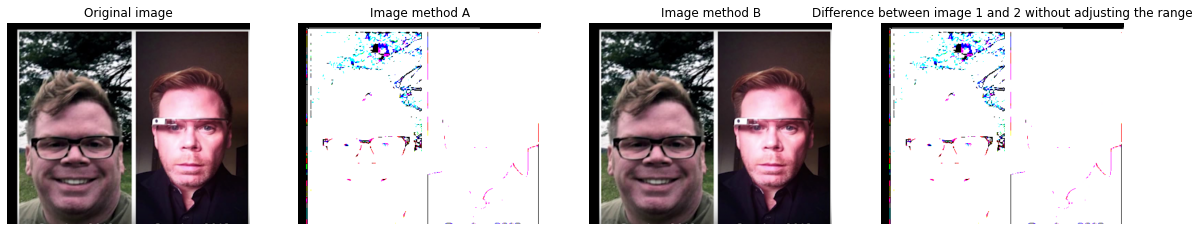

Example of values of the Image 1
----------------------------------
[[  0.   0.   0. 255.]
 [  0.   0.   0. 255.]
 [  0.   0.   0. 255.]
 ...
 [197. 197. 197. 255.]
 [233. 233. 233. 255.]
 [235. 235. 235. 255.]]


Example of values of the Image 2
----------------------------------
[[0.         0.         0.         1.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         1.        ]
 ...
 [0.77254902 0.77254902 0.77254902 1.        ]
 [0.91372549 0.91372549 0.91372549 1.        ]
 [0.92156863 0.92156863 0.92156863 1.        ]]


In [19]:
# Colored image, we are using the image of the previous exercise since is not specified
img = io.imread("images/face.png")

# We change the type of the values from int to float, so the values are from 0. to 255.
im_1 = np.array(img, dtype='float')

# If we wanted to put it in the range of values 0 to 1 we need to divide this values by 255
# im_1 /= 255

# In this case the values are converted to float but the range is 0 to 1.
im_2 = np.array(img)
im_2 = img_as_float(im_2)

# difference without changing range values
dif = im_1 - im_2

plot_in_order(images=[img, im_1, im_2, dif],
              titles=["Original image", "Image method A", "Image method B",
                      "Difference between image 1 and 2 without adjusting the range"],
        gray=[True, True, True, True], rows=1, cols=4)

print("Example of values of the Image 1")
print("----------------------------------")
print(im_1[22])

print("\n\nExample of values of the Image 2")
print("----------------------------------")
print(im_2[22])

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?
Note: Before applying the convolution assure that the color image is of 3 channels and if not use rgba2rgb().

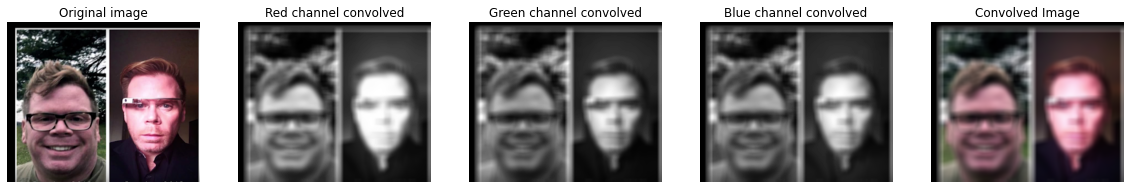

In [13]:
# Load image
face_img = io.imread("images/face.png")

# Convert to rgb
face_img = rgba2rgb(face_img)

# Create mask
mask = np.ones(shape=(15,15))
mask = mask/np.sum(mask)

# Get each channel
r_channel = face_img[:,:,0]
g_channel = face_img[:,:,1]
b_channel = face_img[:,:,2]

# Convolve
r_channel_convolved = ndimage.convolve(r_channel, mask)
g_channel_convolved = ndimage.convolve(g_channel, mask)
b_channel_convolved = ndimage.convolve(b_channel, mask)

image_convolved = face_img.copy()

image_convolved[:,:,0] = r_channel_convolved
image_convolved[:,:,1] = g_channel_convolved
image_convolved[:,:,2] = b_channel_convolved

plot_in_order(images=[face_img, r_channel_convolved, g_channel_convolved, b_channel_convolved, image_convolved],
              titles=["Original image", "Red channel convolved", "Green channel convolved",
                      "Blue channel convolved", "Convolved Image"],
        gray=[True, True, True, True, True], rows=1, cols=5)

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms after applying the 15x15 convolution of the previous exercise.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


In [ ]:
#your solution

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original image and calculate its histogram.
2. Convolve the  reduced image 10 times and calculate its histogram.
3. Convolve the  augmented image 10 times and calculate its histogram.

In [ ]:
#your solution

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

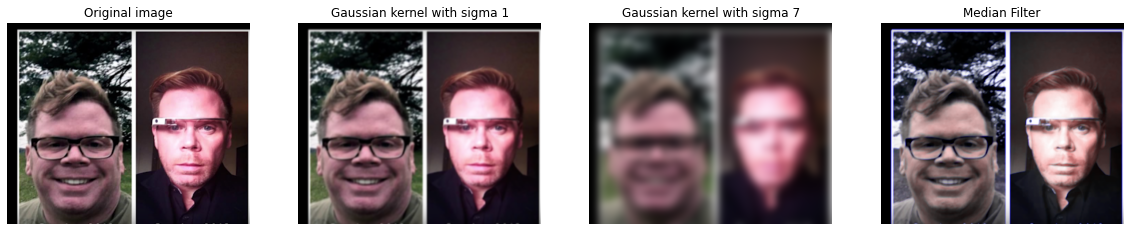

In [34]:
# Load image
face_img = io.imread("images/face.png")

# First we will use a gaussian filter with sigma equals to 1
sigma_1 = filters.gaussian(face_img, 1, multichannel=True) # We are using rgb

# Moreover we will use a gaussian filter with sigma equals to 7
sigma_7 = filters.gaussian(face_img, 7, multichannel=True)

# Lastly we are using the median filter
med_filter = filters.median(face_img)

# Display images
plot_in_order(images=[face_img, sigma_1, sigma_7, med_filter],
              titles=["Original image", "Gaussian kernel with sigma 1", "Gaussian kernel with sigma 7",
                      "Median Filter"],
        gray=[True, True, True, True], rows=1, cols=4)

## Questions

#### Which is the most adequate value for keeping the main objects and structures of the image?
We are using the gaussian method in order to lose image noise but in consequence we also reduce its quality. The bigger the sigma value is, the more viewed is the blurred effect (the image reduces its details). So we have to be careful with the value of sigma because even if we lose noise we also lose image detail.

#### Comment the effect of using different kinds of filters on the original image.
We have already explained how the gaussian filter actues. Altough, the median filter also reduces the image noise it is a smoother technique which preserves better the edges of the image.

b) **(Optional)** Apply the smoothing on some other images and present their results.

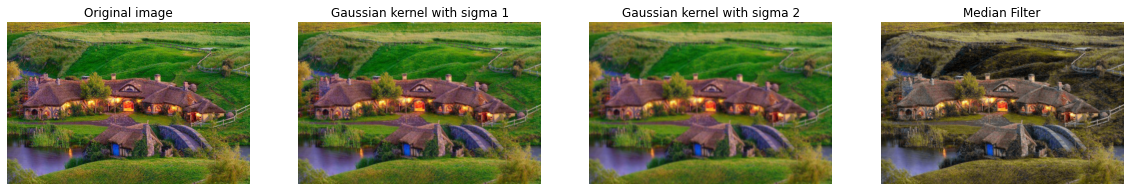

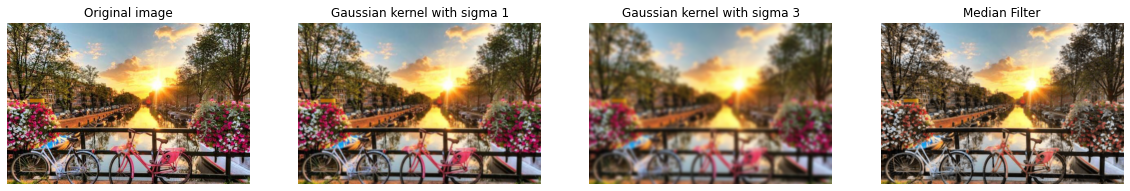

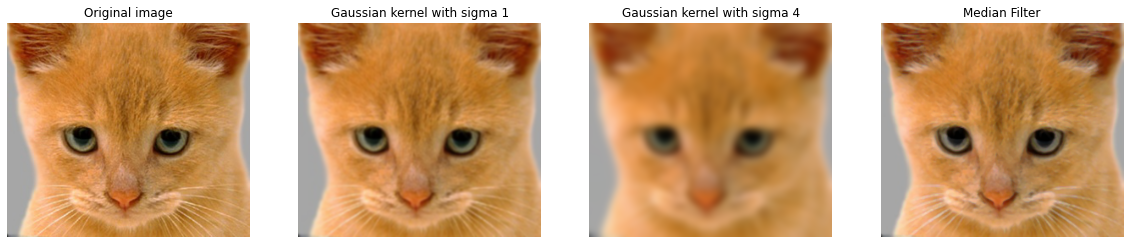

In [44]:
# Load image
house_img = io.imread("images/casa.jpg")
amsterd_img = io.imread("images/amsterdam.jpg")
cat_img = io.imread("images/cat.jpg")

# First we will use a gaussian filter with sigma equals to 1
house_sigma_1 = filters.gaussian(house_img, 1, multichannel=True) # We are using rgb
amsterd_sigma_1 = filters.gaussian(amsterd_img, 1, multichannel=True)
cat_sigma_1 = filters.gaussian(cat_img, 1, multichannel=True)

# Moreover we will use a gaussian filter with sigma equals to 7
house_sigma_2 = filters.gaussian(house_img, 2, multichannel=True)
amsterd_sigma_3 = filters.gaussian(amsterd_img, 3, multichannel=True)
cat_sigma_4 = filters.gaussian(cat_img, 4, multichannel=True)

# Lastly we are using the median filter
house_med_filter = filters.median(house_img)
amsterd_med_filter = filters.median(amsterd_img)
cat_med_filter = filters.median(cat_img)

# Display images
plot_in_order(images=[house_img, house_sigma_1, house_sigma_2, house_med_filter],
              titles=["Original image", "Gaussian kernel with sigma 1", "Gaussian kernel with sigma 2",
                      "Median Filter"],
        gray=[True, True, True, True], rows=1, cols=4)

# Display images
plot_in_order(images=[amsterd_img, amsterd_sigma_1, amsterd_sigma_3, amsterd_med_filter],
              titles=["Original image", "Gaussian kernel with sigma 1", "Gaussian kernel with sigma 3",
                      "Median Filter"],
        gray=[True, True, True, True], rows=1, cols=4)

# Display images
plot_in_order(images=[cat_img, cat_sigma_1, cat_sigma_4, cat_med_filter],
              titles=["Original image", "Gaussian kernel with sigma 1", "Gaussian kernel with sigma 4",
                      "Median Filter"],
        gray=[True, True, True, True], rows=1, cols=4)

#### (Optional) Apply the smoothing on some other images and present their results.
We can observe that in the 3 images the gaussian technique with sigma 1 and the median filter both presents decent image quality (and we lose noise in the image). The biggest difference we can observe in the house image where in the median filter the colors are more passive compared to the original image and the gaussian filter (sigma = 1).
Moreover we can see that with sigma > 1 we have different results. With sigma = 2 we still have a "decent" quality image but sigma = 4 the cat image loses too much details.

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

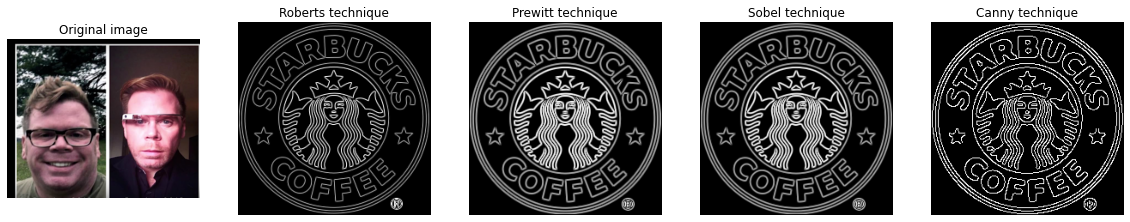

In [37]:
logo_img = io.imread('images/logo.png')
logo_img = rgb2gray(logo_img)

logo_img_roberts = filters.roberts(logo_img) # -> Roberts
logo_img_prewitt = filters.prewitt(logo_img)
logo_img_sobel = filters.sobel(logo_img)
logo_img_canny = feature.canny(logo_img, 1) #Sigma = 1 

plot_in_order(images=[face_img, logo_img_roberts, logo_img_prewitt, logo_img_sobel, logo_img_canny],
              titles=["Original image", "Roberts technique", "Prewitt technique",
                      "Sobel technique", "Canny technique"],
        gray=[True, True, True, True, True], rows=1, cols=5)

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

In [ ]:
#your solution

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


In [ ]:
#your solution

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

In [ ]:
#your solution

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

In [ ]:
#your solution

c) **(Optional)**

Compute hybrid images from other images. Apply it over color images.

In [ ]:
#your solution

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

In [1]:
#your solution